# 日経平均株価 日足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

symbol = '^N225'
ticker = yf.Ticker(symbol)

#df = ticker.history(period='1y', start='2024-01-01', end='2024-12-31') # All data in 2024
df = ticker.history(period='6mo')  # All data in 2024
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-29 00:00:00+09:00,38139.121094,38719.699219,38010.011719,38468.628906,107300000,0.0,0.0
2024-07-30 00:00:00+09:00,38241.351562,38531.160156,38076.699219,38525.949219,109700000,0.0,0.0
2024-07-31 00:00:00+09:00,38140.769531,39188.371094,37954.378906,39101.820312,146400000,0.0,0.0
2024-08-01 00:00:00+09:00,38781.558594,38781.558594,37737.878906,38126.328125,178800000,0.0,0.0
2024-08-02 00:00:00+09:00,37444.171875,37471.519531,35880.148438,35909.699219,204300000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-23 00:00:00+09:00,39810.058594,40036.070312,39677.218750,39958.871094,119100000,0.0,0.0
2025-01-24 00:00:00+09:00,40060.488281,40279.789062,39806.691406,39931.980469,122600000,0.0,0.0
2025-01-27 00:00:00+09:00,40127.738281,40255.679688,39520.789062,39565.800781,117200000,0.0,0.0


In [2]:
df0 = ticker.history(period='1y')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-29 00:00:00+09:00,35814.289062,36186.871094,35813.769531,36026.941406,95500000,0.0,0.0
2024-01-30 00:00:00+09:00,36196.640625,36249.031250,36039.308594,36065.859375,87900000,0.0,0.0
2024-01-31 00:00:00+09:00,35747.890625,36292.531250,35704.578125,36286.710938,111100000,0.0,0.0
2024-02-01 00:00:00+09:00,36008.558594,36146.359375,35924.601562,36011.460938,118100000,0.0,0.0
2024-02-02 00:00:00+09:00,36249.988281,36441.089844,36083.609375,36158.019531,114800000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-23 00:00:00+09:00,39810.058594,40036.070312,39677.218750,39958.871094,119100000,0.0,0.0
2025-01-24 00:00:00+09:00,40060.488281,40279.789062,39806.691406,39931.980469,122600000,0.0,0.0
2025-01-27 00:00:00+09:00,40127.738281,40255.679688,39520.789062,39565.800781,117200000,0.0,0.0


## 日足チャートと Bollinger's bands

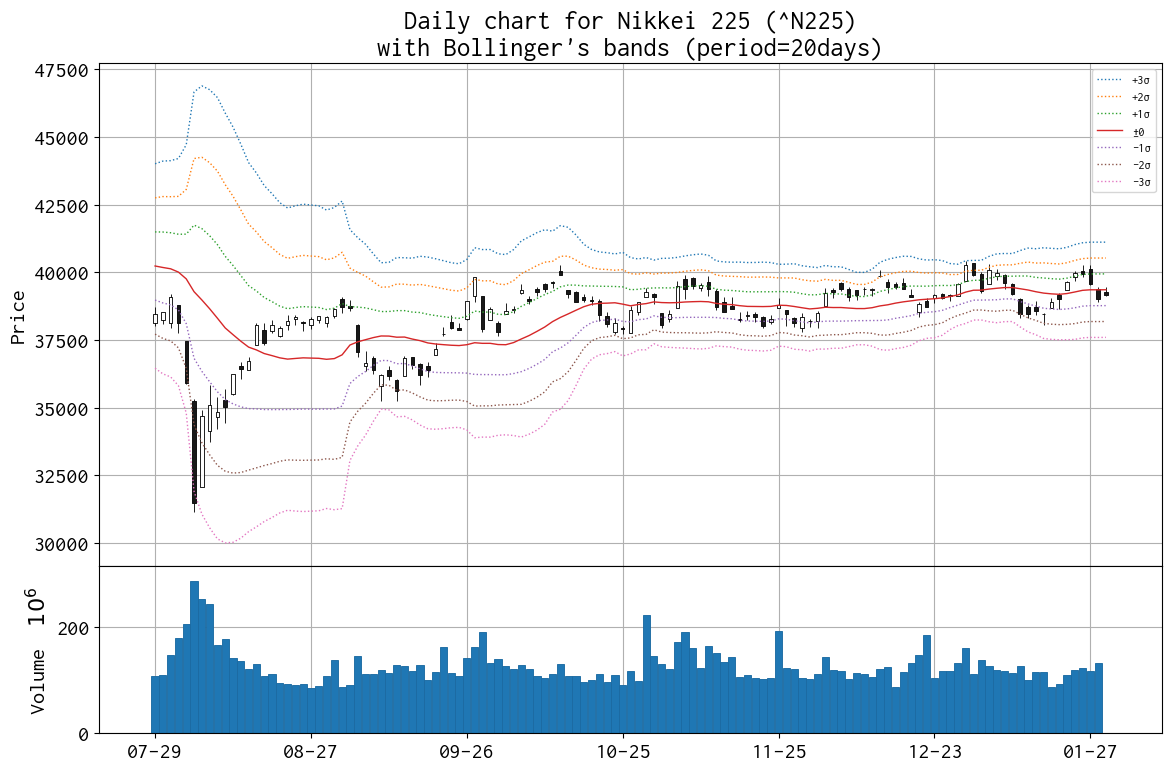

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
period = 20
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=1, linestyle='dotted', label='+3σ', ax=ax[0]),
    mpf.make_addplot(band_upper2[df.index], width=1, linestyle='dotted', label='+2σ', ax=ax[0]),
    mpf.make_addplot(band_upper1[df.index], width=1, linestyle='dotted', label='+1σ', ax=ax[0]),
    mpf.make_addplot(band_mean[df.index], width=1, label='±0', ax=ax[0]),
    mpf.make_addplot(band_lower1[df.index], width=1, linestyle='dotted', label='-1σ', ax=ax[0]),
    mpf.make_addplot(band_lower2[df.index], width=1, linestyle='dotted', label='-2σ', ax=ax[0]),
    mpf.make_addplot(band_lower3[df.index], width=1, linestyle='dotted', label='-3σ', ax=ax[0]),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Daily chart for %s (%s)\nwith Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Daily chart for %s\nwith Bollinger\'s bands (period=20days)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('daily_chart_bollinger_n225.png')
plt.show()

In [4]:
len(df)

123

In [5]:
df.tail(2)['Close']

Date
2025-01-27 00:00:00+09:00    39565.800781
2025-01-28 00:00:00+09:00    39016.871094
Name: Close, dtype: float64

In [6]:
df.tail(2)['Close'].diff()

Date
2025-01-27 00:00:00+09:00           NaN
2025-01-28 00:00:00+09:00   -548.929688
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(25).mean()

Date
2024-01-29 00:00:00+09:00             NaN
2024-01-30 00:00:00+09:00             NaN
2024-01-31 00:00:00+09:00             NaN
2024-02-01 00:00:00+09:00             NaN
2024-02-02 00:00:00+09:00             NaN
                                 ...     
2025-01-22 00:00:00+09:00    39259.915469
2025-01-23 00:00:00+09:00    39264.304688
2025-01-24 00:00:00+09:00    39282.766250
2025-01-27 00:00:00+09:00    39287.098750
2025-01-28 00:00:00+09:00    39273.186406
Name: Close, Length: 245, dtype: float64

In [8]:
df['Close'].rolling(75).mean()

Date
2024-01-29 00:00:00+09:00             NaN
2024-01-30 00:00:00+09:00             NaN
2024-01-31 00:00:00+09:00             NaN
2024-02-01 00:00:00+09:00             NaN
2024-02-02 00:00:00+09:00             NaN
                                 ...     
2025-01-22 00:00:00+09:00    38965.325365
2025-01-23 00:00:00+09:00    38982.750729
2025-01-24 00:00:00+09:00    39011.060312
2025-01-27 00:00:00+09:00    39024.576875
2025-01-28 00:00:00+09:00    39029.660208
Name: Close, Length: 245, dtype: float64

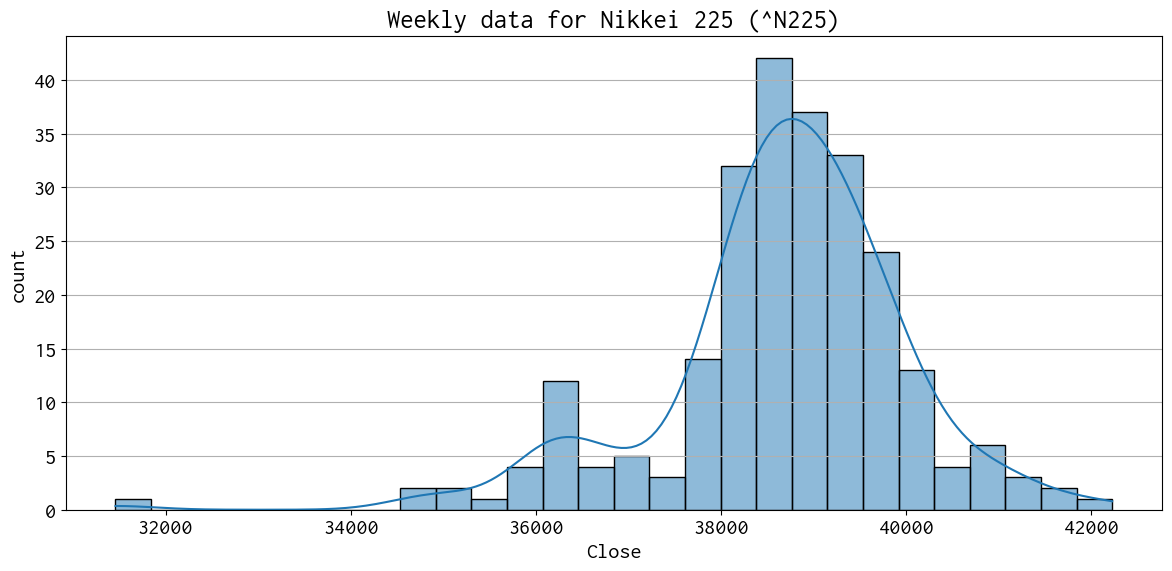

In [9]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('daily_histogram_n225.png')
plt.show()

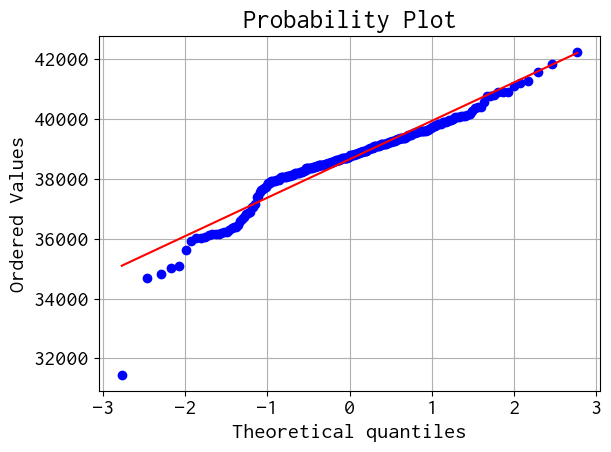

In [10]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()

plt.tight_layout()
plt.savefig('daily_qqplot_n225.png')
plt.show()

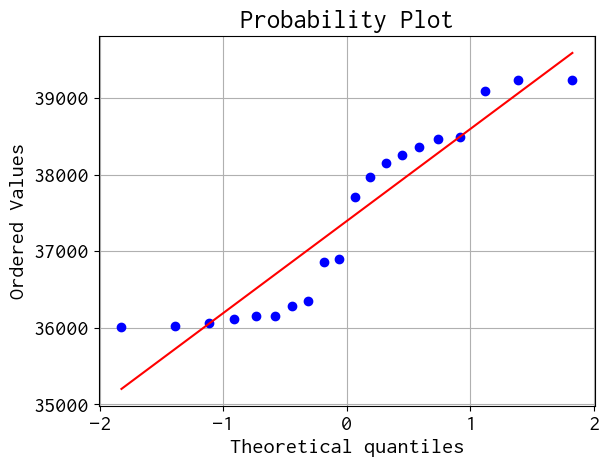

In [11]:
# Q-Qプロットの描画
stats.probplot(df.iloc[0:20]['Close'], dist="norm", plot=plt)

plt.grid()
plt.show()

In [12]:
len(df)

245

In [13]:
stat, pval = stats.shapiro(df['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.932, p-value: 0.000


In [14]:
stat, pval = stats.shapiro(df.iloc[0:20]['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.863, p-value: 0.009


In [15]:
res = stats.anderson(df['Close'])

In [16]:
print('%.3f' % res.statistic)

4.648


In [17]:
print(res.critical_values)

[0.567 0.646 0.775 0.904 1.075]


In [18]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]


In [19]:
res = stats.anderson(df.iloc[0:20]['Close'])

In [20]:
print('%.3f' % res.statistic)

1.021


In [21]:
print(res.critical_values)

[0.506 0.577 0.692 0.807 0.96 ]


In [22]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]
